# What is the semantic web?

The semantic web is a way to give structure and computer-readable meaning to the information published on the web. See this video for what it's called the *semantic* web:

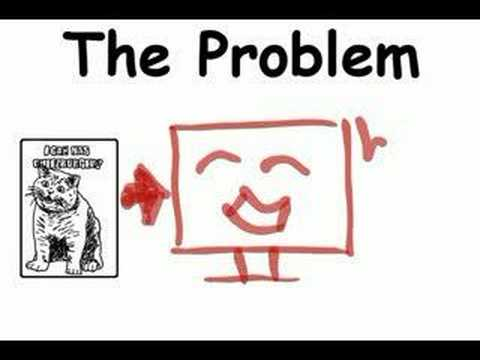

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('OGg8A2zfWKg')

In practical terms, the semantic web means we need to structure our data following some ontologies - descriptions of the precise meaning of the terms we use when structuring the information. In the semantic web, we form very short sentences with a subject, a predicate, and an object. Here is an example in human language:

    Dog has hair

Where:

- `Dog` is the subject - the thing being described.
- `has` is the predicate - the directional relationship between the subject and the object.
- `hair` is the object - the thing being attached to the subject throught the predicate relationship.

If you are used to thinking in graphs (and you should be, if you have experience in life cycle assessment!), then the subject and object are **nodes** in the graph, and the predicates are **edges**. These edges are qualitative, and are limited to the semantics defined for the edge.

In a semantic web graph, this combination of subject, verb, and object are sometimes called a triple.

How do we define semantics? We will use ontologies, which explicitly describe what kinds of subjects, predicates, and objects are allowed, and what they mean. The main ontology used in `py-semantic-taxonomy` is [SKOS](https://www.w3.org/TR/skos-primer/). SKOS is designed to structure a formal knowledge organizational systems. To do so, it defines objects, like `Concept`, and predicates, like `exactMatch`. Here is an example from life cycle assessment:



SKOS has [a good primer](https://www.w3.org/TR/skos-primer/), and the data model for PyST, which builds on top of SKOS with some additional ontologies and some stricter rules, is described in the [PyST documentation](https://docs.pyst.dev/data-model/).

## Low-level graph operations

Before we use the PyST classes and interface, let's take some generic semantic web data, and play with it a bit. To do this we need to load some real data:

In [10]:
import httpx
from rdflib.namespace import DCTERMS, OWL, RDF, SKOS
from rdflib import Graph, Literal, Namespace, URIRef


URL = "https://raw.githubusercontent.com/cauldron/pyst-client/refs/heads/main/pyst_client/units/data/extra-data.ttl"
graph = Graph().parse(URL, format="ttl")

We can then iterate over the *triples* in the graph:

In [12]:
for index, (s, p, o) in enumerate(graph.triples((None, None, None))):
    print(f"Subject: {s}\nPredicate: {p}\nObject: {o}\n")
    if index > 3:
        break

Subject: https://vocab.sentier.dev/units/quantity-kind/LengthTime
Predicate: http://qudt.org/schema/qudt/applicableUnit
Object: https://vocab.sentier.dev/units/unit/M-YR

Subject: https://vocab.sentier.dev/units/unit/KiloGM-PER-L
Predicate: http://www.w3.org/2004/02/skos/core#exactMatch
Object: https://glossary.ecoinvent.org/ids/b06bab82-f0e8-426d-849a-ebdb5b553519

Subject: https://vocab.sentier.dev/units/quantity-kind/AreaTime
Predicate: http://www.w3.org/2004/02/skos/core#definition
Object: Occupation or use of a given are over a period of time.

Subject: https://vocab.sentier.dev/units/unit/KiloM-TONNE
Predicate: http://www.w3.org/2004/02/skos/core#prefLabel
Object: Tonne (metric) kilometre

Subject: https://vocab.sentier.dev/units/unit/L-DAY
Predicate: http://qudt.org/schema/qudt/hasDimensionVector
Object: http://qudt.org/vocab/dimensionvector/A0E0L3I0M0H0T1D0



In the semantic web, subjects are normally [URIs](https://en.wikipedia.org/wiki/Uniform_Resource_Identifier), like `https://vocab.sentier.dev/units/quantity-kind/LengthTime`. They have the type `rdflib.URIRef`:

In [9]:
type(s)

rdflib.term.URIRef

The predicate is also a URI, and must be a term from an ontology. In this case, we see two ontologies: QUDT and SKOS.

In [13]:
type(p)

rdflib.term.URIRef

You can click on the link [http://qudt.org/schema/qudt/hasDimensionVector](http://qudt.org/schema/qudt/hasDimensionVector) and see its description. This is one of the advantages of the semantic web approach - it can be self-describing.

Predicates have limits on how they can be used. They define their *domain* - the allowed subject types - and their **range** - the allowed object types. For example, in QUDT the conversion factors must have a domain of a unit and a range of a literal number.

## Filtering the graph

We can iterate over the graph and only get the triples we want. We can filter by any combination of subject, predicate, and/or object:

In [14]:
for index, (s, p, o) in enumerate(graph.triples((URIRef("https://vocab.sentier.dev/units/unit/KiloM-TONNE"), None, None))):
    print(f"Subject: {s}\nPredicate: {p}\nObject: {o}\n")
    if index > 3:
        break

Subject: https://vocab.sentier.dev/units/unit/KiloM-TONNE
Predicate: http://www.w3.org/1999/02/22-rdf-syntax-ns#type
Object: http://www.w3.org/2004/02/skos/core#Concept

Subject: https://vocab.sentier.dev/units/unit/KiloM-TONNE
Predicate: http://qudt.org/schema/qudt/applicableSystem
Object: http://qudt.org/vocab/sou/CGS

Subject: https://vocab.sentier.dev/units/unit/KiloM-TONNE
Predicate: http://qudt.org/schema/qudt/applicableSystem
Object: http://qudt.org/vocab/sou/SI

Subject: https://vocab.sentier.dev/units/unit/KiloM-TONNE
Predicate: http://qudt.org/schema/qudt/conversionMultiplier
Object: 1000000.0

Subject: https://vocab.sentier.dev/units/unit/KiloM-TONNE
Predicate: http://qudt.org/schema/qudt/conversionMultiplierSN
Object: 1000000.0



In [16]:
for index, (s, p, o) in enumerate(graph.triples((None, URIRef("http://qudt.org/schema/qudt/conversionMultiplier"), None))):
    print(f"Subject: {s}\nPredicate: {p}\nObject: {o}\n")
    if index > 3:
        break

Subject: https://vocab.sentier.dev/units/unit/SEC-PER-M2
Predicate: http://qudt.org/schema/qudt/conversionMultiplier
Object: 1.0

Subject: https://vocab.sentier.dev/units/unit/M2-SEC
Predicate: http://qudt.org/schema/qudt/conversionMultiplier
Object: 1.0

Subject: https://vocab.sentier.dev/units/unit/PERSON-M
Predicate: http://qudt.org/schema/qudt/conversionMultiplier
Object: 1.0

Subject: https://vocab.sentier.dev/units/unit/M-SEC
Predicate: http://qudt.org/schema/qudt/conversionMultiplier
Object: 1.0

Subject: https://vocab.sentier.dev/units/unit/KiloGM-SEC
Predicate: http://qudt.org/schema/qudt/conversionMultiplier
Object: 1.0



We can use ontology namespaces to avoid writing long `URIRef(...)` all the time:

In [17]:
URIRef("http://www.w3.org/2004/02/skos/core#prefLabel"), SKOS.prefLabel

(rdflib.term.URIRef('http://www.w3.org/2004/02/skos/core#prefLabel'),
 rdflib.term.URIRef('http://www.w3.org/2004/02/skos/core#prefLabel'))

## Object types

Objects can have complex types. We have basic strings, numbers, URIs, etc., but we can also have multilingual strings or other rich object. Here is an example - in this case, the object is a literal with a language attached:

In [22]:
for s, p, o in graph.triples((URIRef("https://vocab.sentier.dev/units/unit/M2-SEC"), SKOS.prefLabel, None)):
    print(f"Subject: {s}\nPredicate: {p}\nObject: {o} ({o.language})\n")

Subject: https://vocab.sentier.dev/units/unit/M2-SEC
Predicate: http://www.w3.org/2004/02/skos/core#prefLabel
Object: Square metre second (en-GB)

Subject: https://vocab.sentier.dev/units/unit/M2-SEC
Predicate: http://www.w3.org/2004/02/skos/core#prefLabel
Object: Square meter second (en-US)



In [24]:
o

rdflib.term.Literal('Square meter second', lang='en-US')

## Working with PyST

This gets complicated quickly - we are working on the simple PyST client to make most of the complexity disappear.

In [25]:
from pyst_client.simple import *

## Setup

We first need to setup the client. This means we need to specify the following for reading:

* PyST server URL base path: `settings.set_server_url(<url>)`, e.g. `settings.set_server_url("https://vocab.bonsai.uno")`. Trailing slash is optional.

If writing, then also set the following:

* PyST API authentication key: `settings.set_api_key(<api_key>`, e.g. `settings.set_api_key("supersecret")`.
* Default creation language. This must be a [RFC 3987](https://datatracker.ietf.org/doc/html/rfc3987) language code, and should be one of the PyST server configured languages. All multilingual strings without language codes will use this language: `settings.set_language(<code>)`, e.g. `settings.set_language("es")`.
* Creation base URL. The URL used as a base path for your object's IRIs when using automatic IRI generation: `settings.set_creation_base_url(<url>)`, e.g. `settings.set_creation_base_url("https://awesome.namespace.com")`
* Default creator IRI. Will be used as a fallback default for all created objects when `creator` is not specific: `settings.set_creator(<my_url>)`, e.g. `settings.set_creator("https://valentin.stargazer")`.

In [ ]:
settings.set_server_url("https://vocab.sentier.dev")
settings.set_language("en")
settings.set_creator(<my_url>)
settings.set_creation_base_url(<something>)  # Default is https://ninja.space

## Data creation

The API code is pretty readable - refer to it for more information on each method. For most object classes, you can do the following:

* `object_class.create(args)`
* `object_class.get_one(args)`
* `object_class.get_many(args)`
* `object_instance.save()`
* `object_instance.delete()`

In this course we will focus on reading the data. See the [Client guide](https://github.com/cauldron/pyst-client/blob/main/pyst_client/example/Simple%20client%20library%20guide.ipynb) for instructions on creating data.

### Concept schemes

Let's get the concept scheme for units:

In [31]:
cs = ConceptScheme.get_one("https://vocab.sentier.dev/units/")

2025-10-14 10:32:46 [info     ] Server URL https://vocab.sentier.dev/ successfully loaded from secrets directory
2025-10-14 10:32:46 [info     ] Default language `en` successfully loaded from secrets directory
2025-10-14 10:32:46 [info     ] Server URL `https://vocab.sentier.dev/` is healthy and reachable


In [32]:
cs

ConceptScheme(id_='https://vocab.sentier.dev/units/', types=['http://www.w3.org/2004/02/skos/core#ConceptScheme'], pref_labels=[{'@value': 'Units Concept Scheme based on QUDT version 3.1.6', '@language': 'en'}], status=[{'@id': 'http://purl.org/ontology/bibo/status/accepted'}], notations=[], definitions=[{'@value': 'The QUDT, or "Quantity, Unit, Dimension and Type" schema defines the base classes properties, and restrictions used for modeling physical quantities, units of measure, and their dimensions in various measurement systems. The goal of the QUDT ontology is to provide a unified model of, measurable quantities, units for measuring different kinds of quantities, the numerical values of quantities in different units of measure and the data structures and data types used to store and manipulate these objects in software.\nExcept for unit prefixes, all units are specified in separate vocabularies. Descriptions are provided in both HTML and LaTeX formats. A quantity is a measure of a

The `ConceptScheme` class supports the following attributes:

* id_: str
* types: list[str]
* pref_labels: list[dict[str, str]]
* status: list[dict]
* notations: list[dict[str, str]] 
* definitions: list[dict[str, str]] 
* change_notes: list[dict] 
* history_notes: list[dict] 
* editorial_notes: list[dict] 
* extra: dict 
* created: list[datetime]
* creators: list[dict]
* version: list[str]

For example:

In [33]:
cs.pref_labels

[{'@value': 'Units Concept Scheme based on QUDT version 3.1.6',
  '@language': 'en'}]

This data is in JSON-LD - a way of serializing semantic web data in JSON.

Units are stored in a hierarchy, following the [QUDT](https://qudt.org/) system of units and quantity kinds:

- Quantity kind
    - Reference unit (manually selected)
        - Other unit
        - Other unit
        - Other unit

We can get the top level concepts for this concept scheme:

In [38]:
concepts = Concept.get_many(
    concept_scheme_iri=cs.id_,
    top_concepts_only=True
)
concepts[:2]

[Concept(id_='https://vocab.sentier.dev/units/quantity-kind/Acceleration', types=['http://www.w3.org/2004/02/skos/core#Concept'], pref_labels=[{'@value': 'pospešek', '@language': 'sl'}, {'@value': 'Pecutan', '@language': 'ms'}, {'@value': 'acceleratio', '@language': 'la'}, {'@value': 'accelerazione', '@language': 'it'}, {'@value': 'przyspieszenie', '@language': 'pl'}, {'@value': 'acceleration', '@language': 'en'}, {'@value': 'Beschleunigung', '@language': 'de'}, {'@value': 'التسارع', '@language': 'ar'}, {'@value': 'شتاب', '@language': 'fa'}, {'@value': '加速度', '@language': 'zh'}, {'@value': 'Όγκος', '@language': 'el'}, {'@value': 'accélération', '@language': 'fr'}, {'@value': 'Zrychlení', '@language': 'cs'}, {'@value': 'Ускоре́ние', '@language': 'ru'}, {'@value': '加速度', '@language': 'ja'}, {'@value': 'aceleração', '@language': 'pt'}, {'@value': 'त्वरण', '@language': 'hi'}, {'@value': 'aceleración', '@language': 'es'}, {'@value': 'accelerație', '@language': 'ro'}, {'@value': 'ivme', '@la

Concepts have the following attributes:

* id_: str
* types: list[str]
* pref_labels: list[dict[str, str]]
* status: list[dict]
* notations: list[dict[str, str]] 
* definitions: list[dict[str, str]] 
* change_notes: list[dict] 
* history_notes: list[dict] 
* editorial_notes: list[dict] 
* extra: dict 
* schemes: list[dict]
* alt_labels: list[dict[str, str]] 
* hidden_labels: list[dict[str, str]] 
* top_concept_of: list[dict] 

## Relationships

We can get hierarchical relationships for a concept:

In [40]:
Relationship.get_many(concept=concepts[0])

[[Relationship(source='https://vocab.sentier.dev/units/quantity-kind/Acceleration', target='http://qudt.org/vocab/quantitykind/Acceleration', predicate=<RelationshipVerbs.exact_match: 'http://www.w3.org/2004/02/skos/core#exactMatch'>)],
 [Relationship(source='https://vocab.sentier.dev/units/quantity-kind/Acceleration', target='https://si-digital-framework.org/quantities/ACCE', predicate=<RelationshipVerbs.exact_match: 'http://www.w3.org/2004/02/skos/core#exactMatch'>)]]

We can see these relationships in the web as well:

In [41]:
concepts[0].open_new_tab()

By default, PyST only stores *broader* relationships. The relationship between acceleration and its reference unit (meters per second squared) is *narrower from the perspective of acceleration*. We can get reciprocal relationships by looking for relationships where acceleration *is the target*:

In [42]:
Relationship.get_many(concept=concepts[0], target=True)

[[Relationship(source='https://vocab.sentier.dev/units/quantity-kind/Acceleration', target='http://qudt.org/vocab/quantitykind/Acceleration', predicate=<RelationshipVerbs.exact_match: 'http://www.w3.org/2004/02/skos/core#exactMatch'>)],
 [Relationship(source='https://vocab.sentier.dev/units/quantity-kind/Acceleration', target='https://si-digital-framework.org/quantities/ACCE', predicate=<RelationshipVerbs.exact_match: 'http://www.w3.org/2004/02/skos/core#exactMatch'>)],
 [Relationship(source='https://vocab.sentier.dev/units/unit/M-PER-SEC2', target='https://vocab.sentier.dev/units/quantity-kind/Acceleration', predicate=<RelationshipVerbs.broader: 'http://www.w3.org/2004/02/skos/core#broader'>)]]

## Associations

Associations are across concept schemes, but do not include information on the *quality* of the association.

In [43]:
URL = "https://vocab.sentier.dev/products/ecoinvent/3.11/1f9d8150-57b5-4e5f-a9bf-b71cbb1be302"
Association.get_many(source_concept=Concept.get_one(URL))

[Association(id_='https://vocab.sentier.dev/products/correspondence/ei-products-3.11-CN-2024/2c1b9dae71d649398d3d0d81b1a32ab8', types=['http://rdf-vocabulary.ddialliance.org/xkos#ConceptAssociation'], source_concepts=[{'@id': 'https://vocab.sentier.dev/products/ecoinvent/3.11/1f9d8150-57b5-4e5f-a9bf-b71cbb1be302'}], target_concepts=[{'@id': 'http://data.europa.eu/xsp/cn2024/690100000010'}], kind=<AssociationKind.simple: 'simple'>, extra={'http://rdf-vocabulary.ddialliance.org/xkos#Correspondence': 'https://vocab.sentier.dev/products/correspondence/ei-products-3.11-CN-2024'}),
 Association(id_='https://vocab.sentier.dev/products/ecoinvent/3.11/ei-products-3.10-ei-products-3.11/17bd819120ae4962bccd330ac387d199', types=['http://rdf-vocabulary.ddialliance.org/xkos#ConceptAssociation'], source_concepts=[{'@id': 'https://vocab.sentier.dev/products/ecoinvent/3.11/1f9d8150-57b5-4e5f-a9bf-b71cbb1be302'}], target_concepts=[{'@id': 'https://vocab.sentier.dev/products/ecoinvent/3.10/1f9d8150-57b5-

In [44]:
Concept.get_one(URL).open_new_tab()